In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Read CSV file
diabetes_data = pd.read_csv('D:\Data_Mining\code\diabetes.csv',header=1) can change the header the default is 0 if header = none there is no header
skiprows = 1 means we are ignoring first row and names= option is used to assign variable names manually.
The na_values= options is used to set some values as blank / missing values while importing 
CSV file
Skip Last 5 Rows = skipfooter = 5
delim_whitespace: if whitespace should be used as a separator.

The df.head(N) function can be used to check 
out first some N rows.
– By Default, Return with 5 rows.
• The df.tail(N) function can be used to check 
out last some N rows

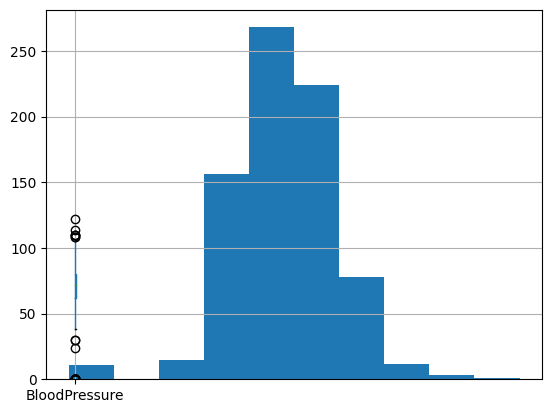

In [32]:
diabetes_data = pd.read_csv('D:\\Data_Mining\\code\\diabetes.csv')
diabetes_data_header = pd.read_csv(
    'D:\\Data_Mining\\code\\diabetes.csv', header=1) 
diabetes_data_skip = pd.read_csv(
    'D:\\Data_Mining\\code\\diabetes.csv', skiprows=4)
diabetes_data_non = pd.read_csv(
    'D:\\Data_Mining\\code\\diabetes.csv', na_values=['0'])
diabetes_data_drop = diabetes_data.drop(['Glucose'], axis=1) # if axis = 1 drop column else drop row &&&&& by default its 0
diabetes_data_query = diabetes_data.query("Glucose > 100")
diabetes_data_hist = diabetes_data['BMI'].hist()
diabetes_data_boxPlot = diabetes_data.boxplot(column='BloodPressure')


Print Outputting

Check Null values

In [33]:
diabetes_data.isnull()

diabetes_data.isnull().sum() # لو عايز اعرف القيم المفقوده فى كل عمود
diabetes_data.isnull().sum().sum() #لو عايز أعرف القيم المفقودة فى الداتا كلها 

0

In [34]:

print(diabetes_data)
#print(diabetes_data.head(5)) # return first 5 rows
#print(diabetes_data.tail(5)) # return last 5 rows
# print(diabetes_data.loc[:,'BMI'])
#print(diabetes_data.iloc[:,1]) # return second column
#print(diabetes_data_drop)
# print(f"Number of rows & columns: {diabetes_data.shape}")  # to find out number of rows and columns
# print(diabetes_data.columns)  # return columns names in array
# print(diabetes_data.dtypes)  # return columns types
#print(diabetes_data.describe())  # To summarize DataFrame
# print(diabetes_data_header)
# print(diabetes_data_footer)
# print(diabetes_data_skip)
#print(diabetes_data_query)
#print(diabetes_data_hist)
print(diabetes_data_boxPlot)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

*MLxtend*

In [35]:
dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#apriori(df, min_support=0.6)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(
    lambda x: len(x))  # apply method takes a function and applies it to all values of pandas series
# frequent_itemsets
frequent_itemsets[(frequent_itemsets['length'] == 3) &
                  (frequent_itemsets['support'] >= 0.5)]


,support,itemsets,length
10,0.6,"(Onion, Eggs, Kidney Beans)",3


*Association*

In [36]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


*FP-Grouth*

In [37]:
fpgrowth(df, min_support=0.6, use_colnames=True)


,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Onion, Eggs, Kidney Beans)"


*Decision Tree*

In [38]:
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("D:\\Data_Mining\\code\\diabetes.csv",
                   header=0, names=col_names)
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi',
                'age', 'glucose', 'bp', 'pedigree']
# Features
X = pima[feature_cols]
# Target variable
y = pima.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
112,0,1
449,0,0
735,0,0
467,0,0
581,0,0
...,...,...
153,0,0
720,0,0
94,0,0
305,0,0


*KNN Classifier*

In [39]:
knn_x = [
    [25,4000],
    [35,60000],
    [45,80000],
    [20,20000],
    [35,120000],
    [52,18000],
    [23,95000],
    [40,62000],
    [60,100000],
    [48,220000],
    [33,150000]
]
knn_y = ['no','no','no','no','no','no','yes','yes','yes','yes','yes']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(knn_x, knn_y)
print(knn.predict([[48, 142000]]))
#print(knn.predict_proba([[48,142000]]))


['yes']


*KMeans*

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.05200374878709041

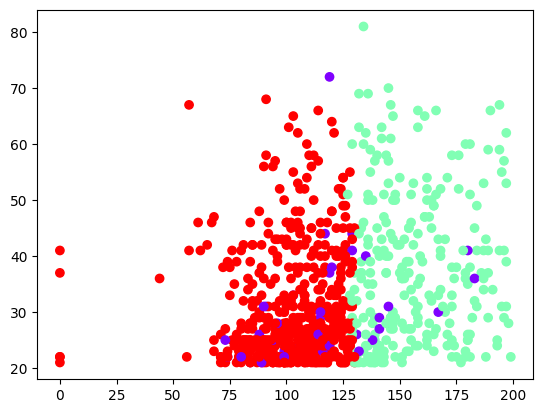

In [40]:
#plt.scatter(diabetes_data['Glucose'], diabetes_data['Age'], label='True Position')
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(diabetes_data)

kmeans_model.labels_

# centroid coordinates for each cluster in the fitted model.
kmeans_model.cluster_centers_

kmeans_model.fit(diabetes_data[['Glucose', 'BloodPressure']])
kmeans_model.predict([[11, 2]])
#=================================================================#
plt.scatter(diabetes_data['Glucose'], diabetes_data['Age'],
            c=kmeans_model.labels_, cmap='rainbow')

score = silhouette_score(diabetes_data, kmeans_model.labels_)
score

*Gaussian Naïve Bayes Classifier*

In [42]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7662337662337663
